In [1]:
import pandas as pd
import time
import datetime
import numpy as np

### Load recipe

In [124]:
df_recipe = pd.read_csv('hrv_recipe.csv')
cols = [col for col in df_recipe.columns if col not in ['set', 'category']]
df_recipe = df_recipe[cols]
df_recipe

,Unnamed: 0,name,files,channel,time,duration,GA start,GA finish,CT start,CT finish
0,0,GA-2023-07-05,"['Mouse03 to 06_20230702 pm.mat', 'Mouse03 to ...",5,2023-07-03 08:40:00.0,43200,2023-07-05 16:00:00,2023-07-05 21:00:00,19.5,0.5
1,1,GA-2023-07-05,"['Mouse03 to 06_20230702 pm.mat', 'Mouse03 to ...",5,2023-07-04 20:40:00.0,43200,2023-07-05 16:00:00,2023-07-05 21:00:00,19.5,0.5
2,2,GA-2023-06-07,"['Mouse03 to 06_20230605 pm.mat', 'Mouse03 to ...",5,2023-06-06 11:30:00.0,43200,2023-06-07 14:00:00,2023-06-07 19:00:00,14.5,19.5
3,3,GA-2023-06-07,"['Mouse03 to 06_20230605 pm.mat', 'Mouse03 to ...",8,2023-06-06 12:30:00.0,43200,2023-06-07 14:00:00,2023-06-07 19:00:00,14.7,19.7
4,4,GA-2023-06-07,"['Mouse03 to 06_20230605 pm.mat', 'Mouse03 to ...",5,2023-06-05 23:30:00.0,43200,2023-06-07 14:00:00,2023-06-07 19:00:00,14.5,19.5
5,5,GA-2023-06-07,"['Mouse03 to 06_20230605 pm.mat', 'Mouse03 to ...",8,2023-06-06 00:30:00.0,43200,2023-06-07 14:00:00,2023-06-07 19:00:00,14.7,19.7
6,6,GA-2023-05-23,"['Mouse03 to 06_20230521 pm.mat', 'Mouse03 to ...",5,2023-05-22 13:00:00.0,43200,2023-05-23 09:00:00,2023-05-23 14:00:00,8.0,13.0
7,7,GA-2023-05-23,"['Mouse03 to 06_20230521 pm.mat', 'Mouse03 to ...",8,2023-05-22 14:30:00.0,43200,2023-05-23 09:00:00,2023-05-23 14:00:00,7.0,12.0
8,8,GA-2023-05-23,"['Mouse03 to 06_20230521 pm.mat', 'Mouse03 to ...",5,2023-05-22 01:00:00.0,43200,2023-05-23 09:00:00,2023-05-23 14:00:00,8.0,13.0
9,9,GA-2023-05-23,"['Mouse03 to 06_20230521 pm.mat', 'Mouse03 to ...",8,2023-05-22 02:30:00.0,43200,2023-05-23 09:00:00,2023-05-23 14:00:00,7.0,12.0


## Load extracted data

In [117]:
data = np.load("time-domain-results-2023-09-10 21:02:01.851953.npy", allow_pickle=True).item()

In [134]:
data['during_GA'] = {
    'during_GA':
    [
        {
            'nni_counter': 127512,
            'nni_mean': 134.26517504234894,
            'nni_min': 101.0,
            'nni_max': 171.0,
            'hr_mean': 451.4920681816973,
            'hr_min': 350.87719298245617,
            'hr_max': 594.059405940594,
            'hr_std': 47.21591016610522,
            'nni_diff_mean': 1.1496968888958599,
            'nni_diff_min': 0,
            'nni_diff_max': 70,
            'sdnn': 13.261444073440135,
            'sdnn_index': 2.2278775614611317,
            'sdann': 12.923739089656035,
            'rmssd': 2.1671547043329986,
            'sdsd': 1.837058257862021,
            'nn50': 11,
            'pnn50': 0.008626706715499054,
            'nn20': 184,
            'pnn20': 0.14430127596834783,
            'nn6': 1261,
            'pnn6': 0.9889342880222098,
            'nni_histogram': None,
            'tinn_n': 0,
            'tinn_m': 0,
            'tinn': 0,
            'tri_index': 2.355270692107353,
            'val_level': 0.9843479,
            'channel': 5,
            'from_time': '2023-07-06 20:20:00.0'
        }
    ]
}

In [158]:
convert = {}
for category, v1 in data.items():
    for setup, v2 in v1.items():
        for d in v2:
            for k, v in d.items():
                convert[k] = convert.get(k,[]) + [v]
            convert['set'] = convert.get('set',[]) + [setup]
            convert['category'] = convert.get('category',[]) + [category]
rfd = pd.DataFrame(convert)

df_time_domain = pd.merge(rfd, df_recipe, left_on=["from_time", "channel"], right_on=["time", "channel"])
df_time_domain['set'] = df_time_domain['set']+ ' + ' + df_time_domain['category']
df_time_domain['CT'] = df_time_domain['CT start'].apply(str) + ' to ' + df_time_domain['CT finish'].apply(str)
def get_mouse(x):
    if x==2:
        return '1'
    elif x==5:
        return '4'
    return '5'
df_time_domain['mouse'] = df_time_domain['channel'].apply(lambda x :get_mouse(x))
df_time_domain = df_time_domain.sort_values(['mouse', 'CT start'])

In [84]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

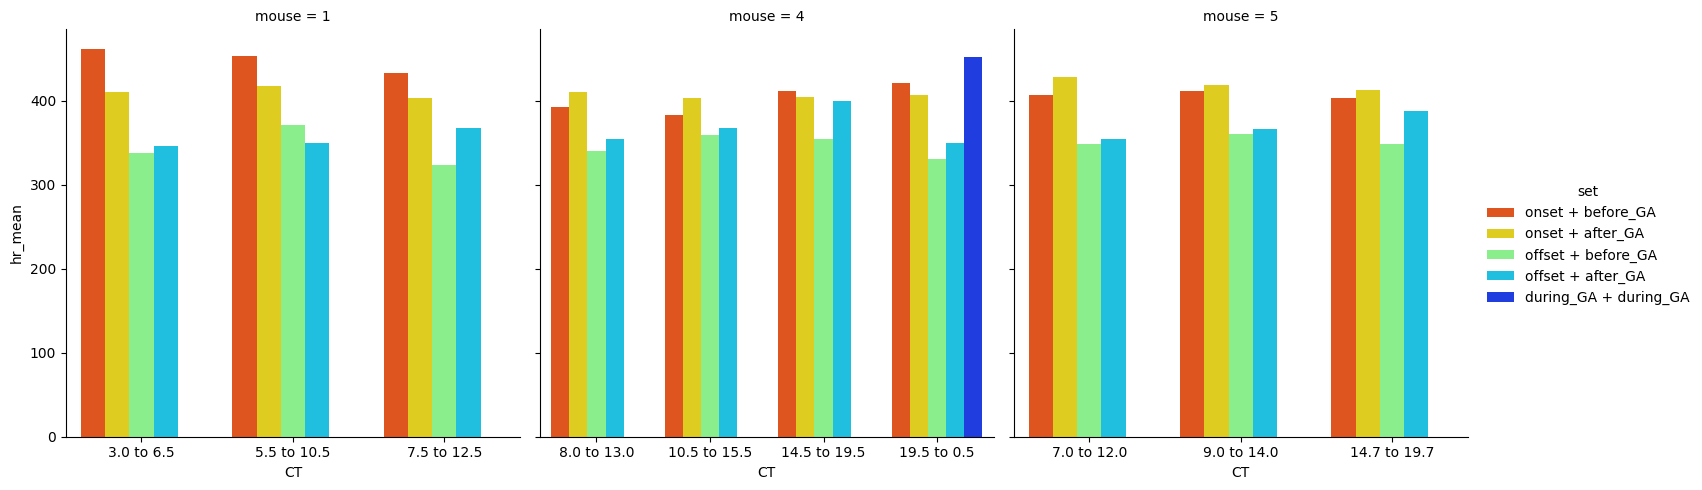

In [159]:
order = ['onset + before_GA', 'onset + after_GA', 'offset + before_GA', 'offset + after_GA', 'during_GA + during_GA']
palette = 'Blues_d'
palette = 'jet_r'
sns.catplot(x="CT", y="hr_mean", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)


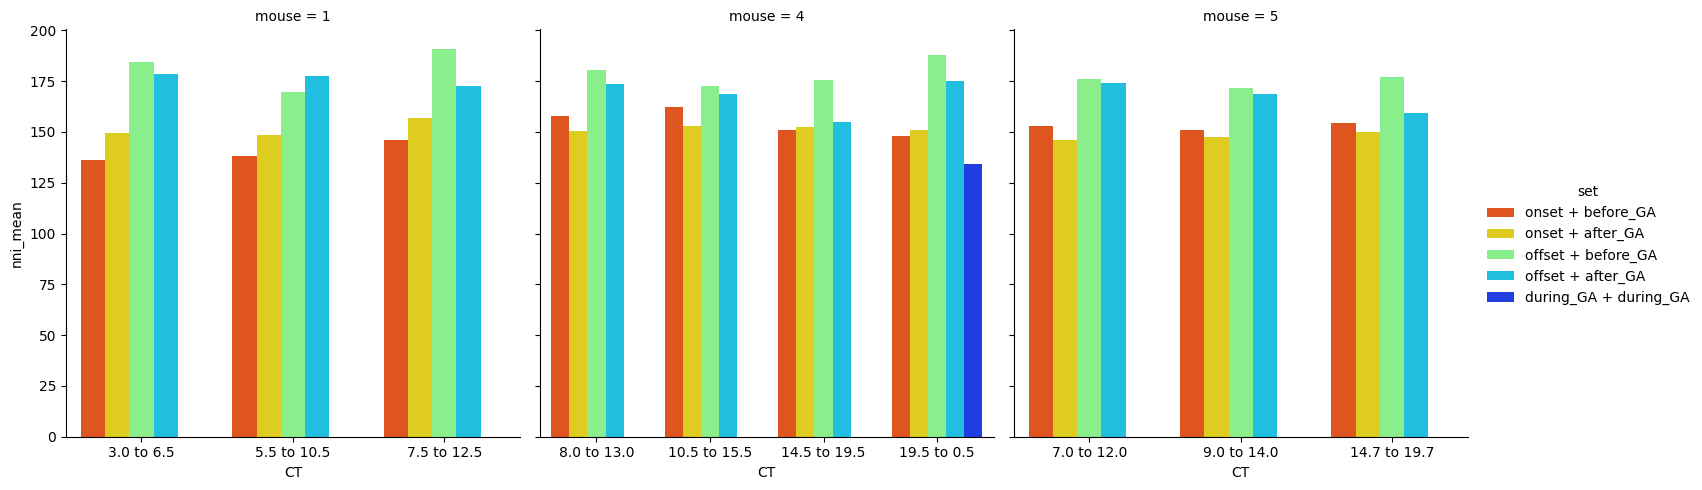

In [160]:
sns.catplot(x="CT", y="nni_mean", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)

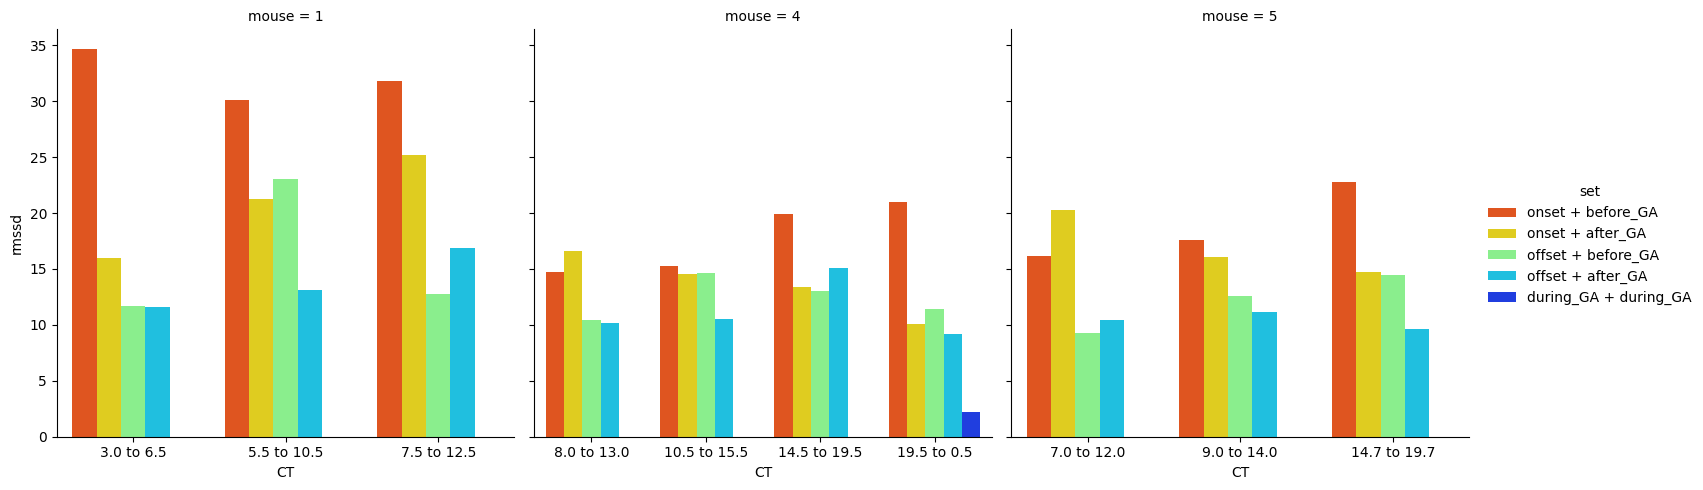

In [161]:
sns.catplot(x="CT", y="rmssd", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)

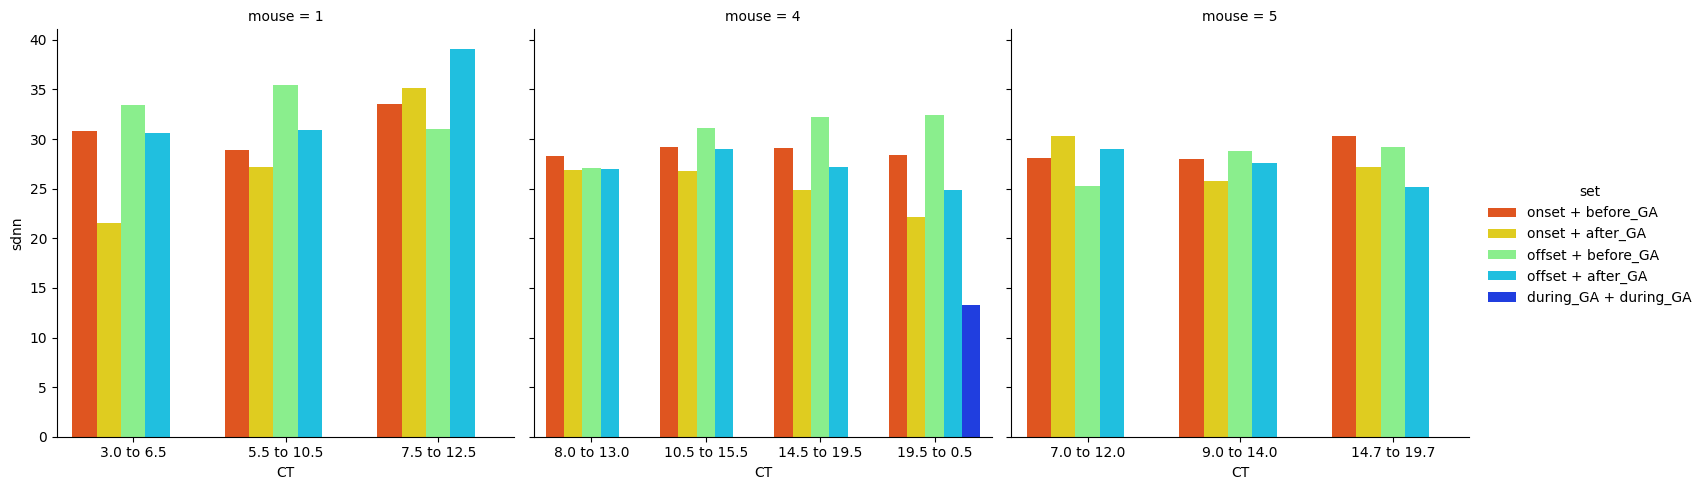

In [163]:
sns.catplot(x="CT", y="sdnn", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)

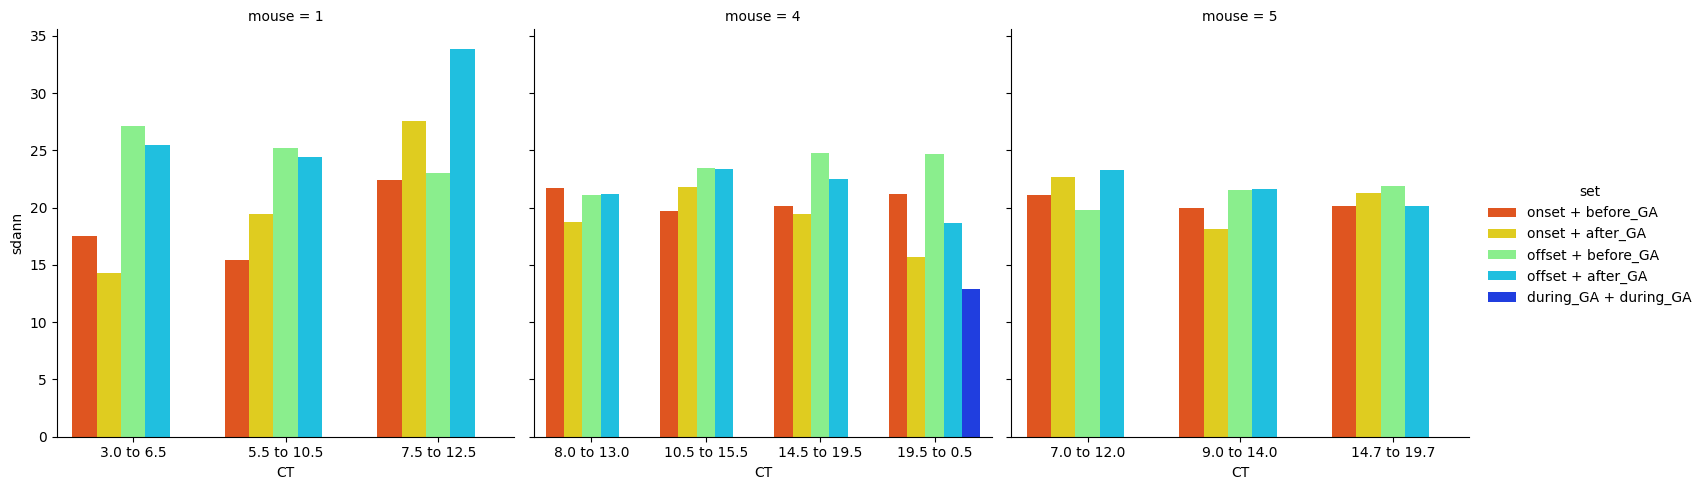

In [164]:
sns.catplot(x="CT", y="sdann", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)

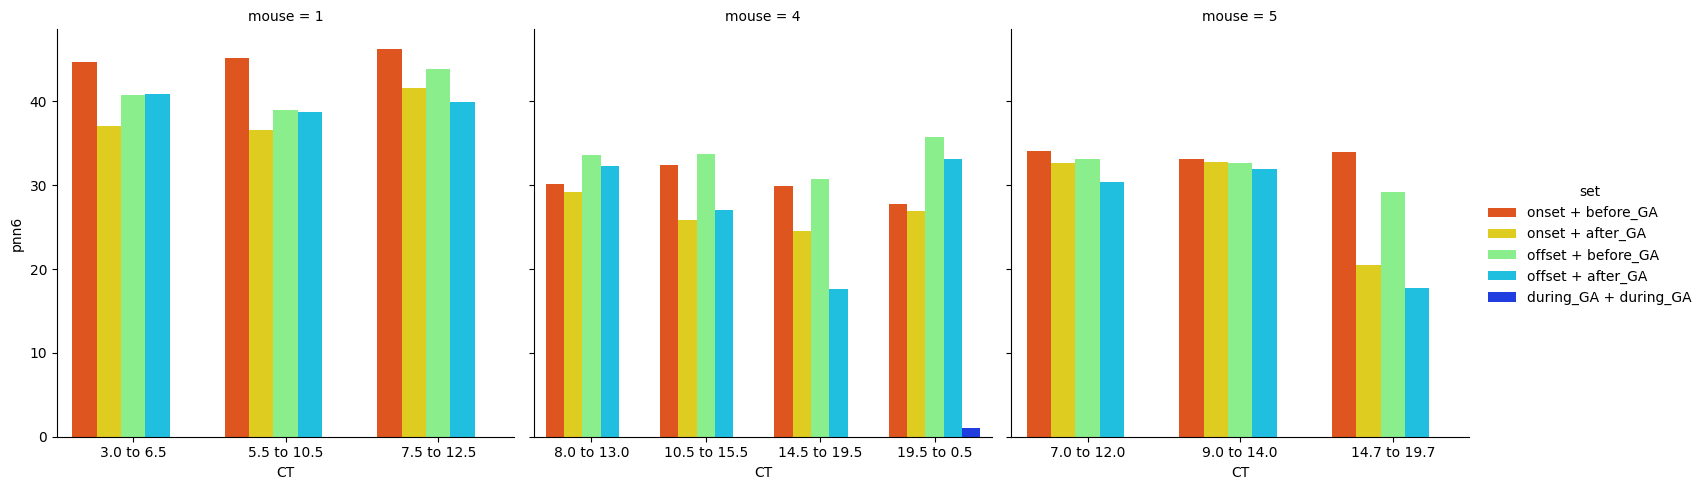

In [165]:
sns.catplot(x="CT", y="pnn6", hue="set", col="mouse", data=df_time_domain, kind="bar", sharex=False, palette=palette, hue_order=order)